In [ ]:
#!pip3 install ultralytics

Código meio macarrônico para os exemplos de detecções paresentados no slide.

In [ ]:
import os
import json
import shutil
import numpy as np
from PIL import Image
from pathlib import Path

In [ ]:
from ultralytics import YOLO

In [ ]:
import torch

In [ ]:
from DataVisualization.object_detection_visualization import *

In [ ]:
from google.colab import drive
from google.colab import runtime

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
shutil.copy("/content/drive/MyDrive/yolo_icdar.pt", "/content/yolo_icdar.pt")
shutil.copy("/content/drive/MyDrive/yolo_fintabnet.pt", "/content/yolo_fintabnet.pt")

'/content/yolo_fintabnet.pt'

In [ ]:
yolo_icdar = YOLO("/content/yolo_icdar.pt")
yolo_fintabnet = YOLO("/content/yolo_fintabnet.pt")

# Segmentação

In [ ]:
results = yolo_icdar.predict(['cTDaR_t00111.jpg'])


0: 640x640 133 cells, 13.1ms
Speed: 2.3ms preprocess, 13.1ms inference, 63.4ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
image = results[0].plot( masks=True, boxes=False)

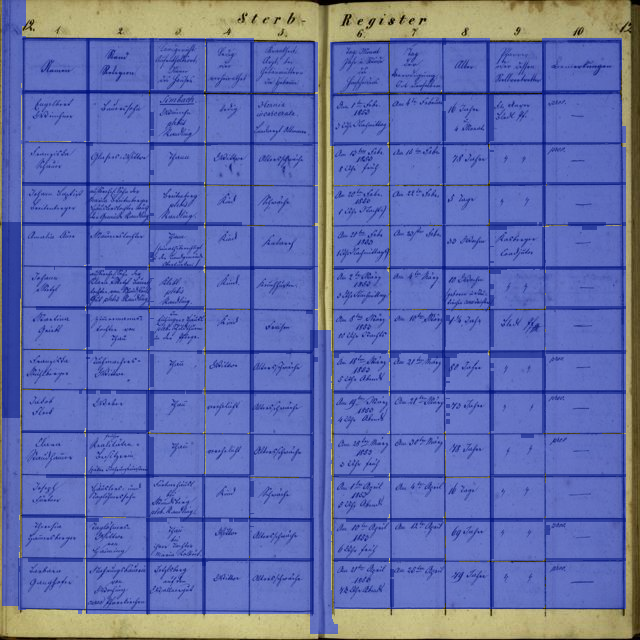

In [ ]:
Image.fromarray(image[:,:,::-1])

# Detecção

In [ ]:
results = yolo_fintabnet.predict(['BAX_2012_page_90_table_0 (1).jpg'])


0: 640x640 1 table, 6 table columns, 2 table column headers, 12 table rows, 2 table spanning cells, 11.1ms
Speed: 2.0ms preprocess, 11.1ms inference, 10.6ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
names = results[0].names
bboxes = results[0].boxes.xyxy.cpu().numpy().astype(np.int32)
class_ids = results[0].boxes.cls.cpu().numpy().astype(np.int32)
confs = results[0].boxes.conf.cpu().numpy()

In [ ]:
image = Image.open('/content/BAX_2012_page_90_table_0.jpg')
image = np.array(image)

for class_id, bbox, conf in zip(class_ids, bboxes, confs) :
    class_name =  names[class_id]
    if class_name == 'table column':
      if conf > 0.63:
        xmin, ymin, xmax, ymax = bbox
        xmin = int(xmin * 678/640)
        xmax = int(xmax * 678/640)
        ymin = int(ymin * 240/640)
        ymax = int(ymax * 240/640)

        class_name =  names[class_id]
        bbox_color = fintab_color_class_map[class_name]
        label = f'{class_name}-{conf:.2f}'

        image = draw_bouding_box(image, xmin, ymin, xmax, ymax, bbox_color=bbox_color,
                                bbox_class=label, font_color=(76,76,77), font_scale=.4,
                                font= cv2.FONT_HERSHEY_DUPLEX, font_thickness=1)


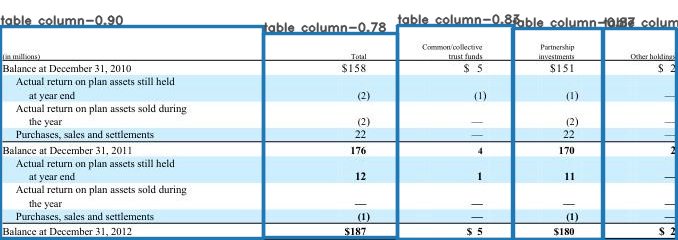

In [ ]:
Image.fromarray(image)